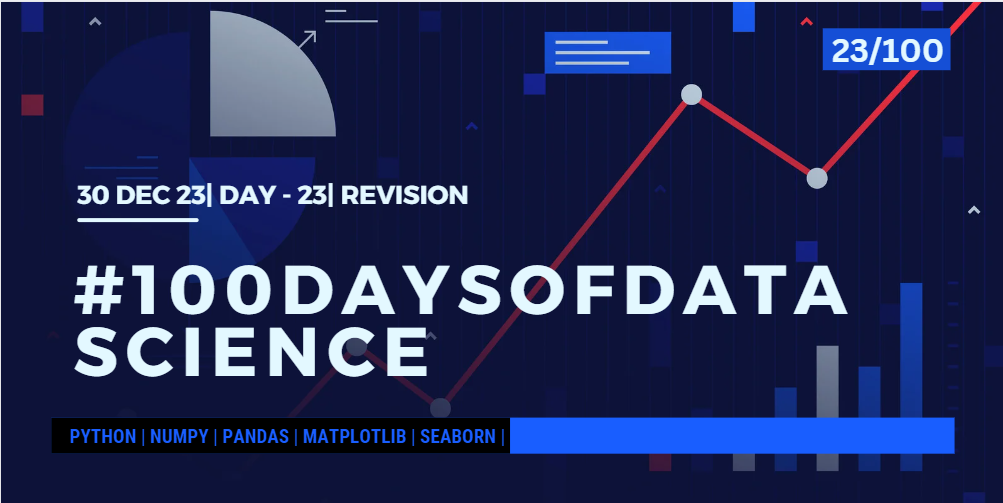

## Libraries

In [1]:
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
sns.set() # this command sets the seaborn chart style as the default

from matplotlib.ticker import PercentFormatter #converts values into percentage format

## Bar Chart

In [5]:
# Read the car data csv file for this task.
df_used_cars = pd.read_csv(r"car_data.csv")

In [6]:
df_used_cars

,Brand,Cars Listings
0,Ferrari,1070
1,Lamborghini,807
2,Bugatti,537
3,Audi,419
4,BMW,636
5,Mercedes-Benz,820
6,Mitsubishi,306
7,Renault,438
8,Toyota,509
9,Volkswagen,875


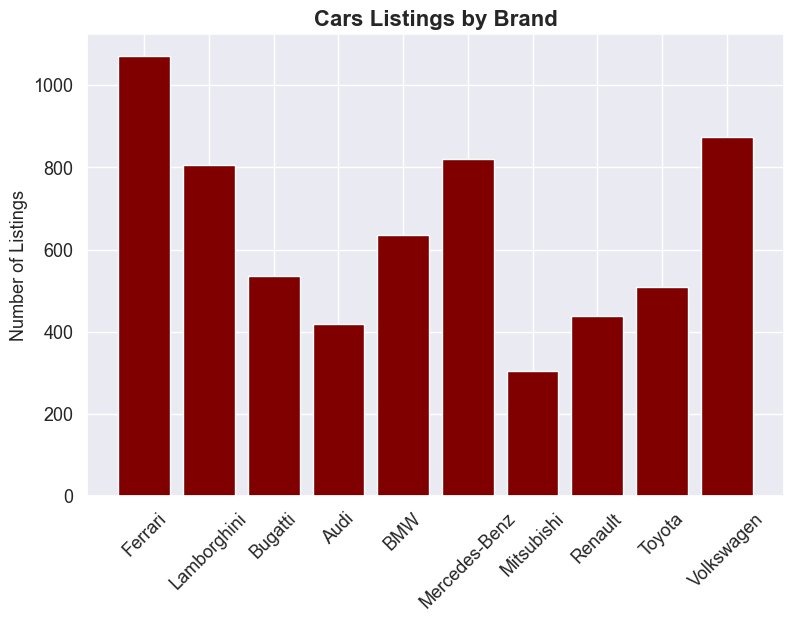

In [14]:
plt.figure(figsize = (9, 6)) #determine the size of the chart
# To create a bar chart with matplotlib you can use the 'bar' function.
plt.bar(x = df_used_cars["Brand"], #specify the x axis
        height = df_used_cars["Cars Listings"], #specify the y axis
        color = "#800000") # the color for the bars
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Cars Listings by Brand", fontsize = 16, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Number of Listings", fontsize = 13 ) #add a title for the y-axis
plt.savefig("Used Cars Bar.png") # you can export your chart as a picture
plt.show() # depending on which environment you're using without this line you're chart may not display properly.

## Stacked Area Chart

In [23]:
# load data. Engine Fuel Types for used cars. Data is collected from 1982 until 2016
df_fuel_engine_types = pd.read_csv("types_data.csv")

In [24]:
df_fuel_engine_types

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340
5,1987,1817,1840,400,940
6,1988,2999,1882,2060,1
7,1989,2626,1641,1304,330
8,1990,1290,3247,1,0
9,1991,1566,6776,1063,400


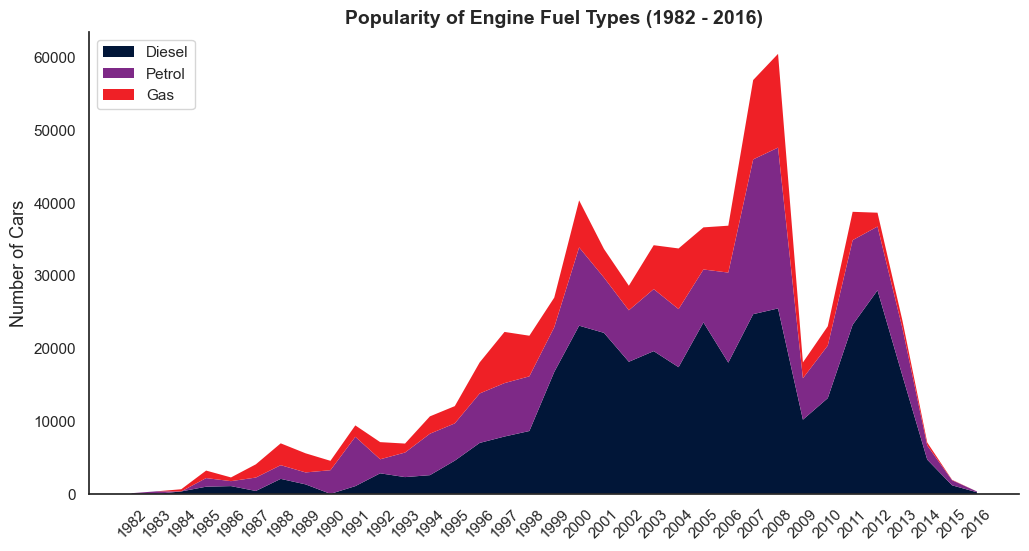

In [26]:
# Create a stacked area chart, with pyplots 'stackplot'. On the x-axis we have the time line - year 1982 to 2016.
# On the y-axis we have the three categories, 'Diesel', 'Petrol' and 'Gas' stacked on top of each other. 
# Note that this ordering is chosen specifically so that categories are from largest to smallest.
# This helps us compare the size of the catogories, as people have difficulties determining the size of non-rectangular shapes.

# Provide a color list, so that each category can have a specific color.
# Color names should appear in the same order as the stacked area plot categories appear.  
colors = ["#011638", "#7e2987", "#ef2026"]
# label list for the legend. Names should appear in the same order as the stacked area plot categories appear. 
labels = ["Diesel", "Petrol", "Gas"]
sns.set_style("white") # Use seaborn's 'white' theme to introduce a white background, instead of the default grey.
plt.figure(figsize = (12, 6))
plt.stackplot(df_fuel_engine_types["Year"],
              df_fuel_engine_types["Diesel"],
              df_fuel_engine_types["Petrol"],
              df_fuel_engine_types["Gas"],
              colors = colors,
              edgecolor = 'none')
plt.xticks(df_fuel_engine_types["Year"], rotation = 45) # Include x-axis labels for each year and rotate labels by 45 degrees.
plt.legend(labels = labels, loc = "upper left") # Add a legend and specify its location on the chart.
plt.ylabel("Number of Cars", fontsize = 13)
plt.title("Popularity of Engine Fuel Types (1982 - 2016)", fontsize = 14, weight = "bold")
sns.despine() # Remove top and right border of the chart.
plt.show()

## Line Chart

In [27]:
# load line chart data
df_spx_ftse_00_10 = pd.read_csv("line_chart_data.csv")

In [28]:
df_spx_ftse_00_10

,Date,GSPC500,FTSE100
0,1/3/2000,0.003264,0.000000
1,1/4/2000,-0.009549,0.000000
2,1/5/2000,-0.038345,-0.038137
3,1/6/2000,0.001922,-0.019502
4,1/7/2000,0.000956,-0.013571
...,...,...,...
2865,12/27/2010,-0.002282,0.002135
2866,12/28/2010,0.003539,0.000000
2867,12/29/2010,-0.000254,0.000000
2868,12/30/2010,0.000524,-0.002080


In [29]:
# Convert 'Date' into datetime format. Otherwise it will be regarded as a simple string
# and it's highly likely that many operations or transformations on the date column won't have the desired result. 
# This is a crucial step in any time series analysis.
df_spx_ftse_00_10["new_date"] = pd.to_datetime(df_spx_ftse_00_10["Date"])

In [30]:
df_spx_ftse_00_10["new_date"]

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
2865   2010-12-27
2866   2010-12-28
2867   2010-12-29
2868   2010-12-30
2869   2010-12-31
Name: new_date, Length: 2870, dtype: datetime64[ns]

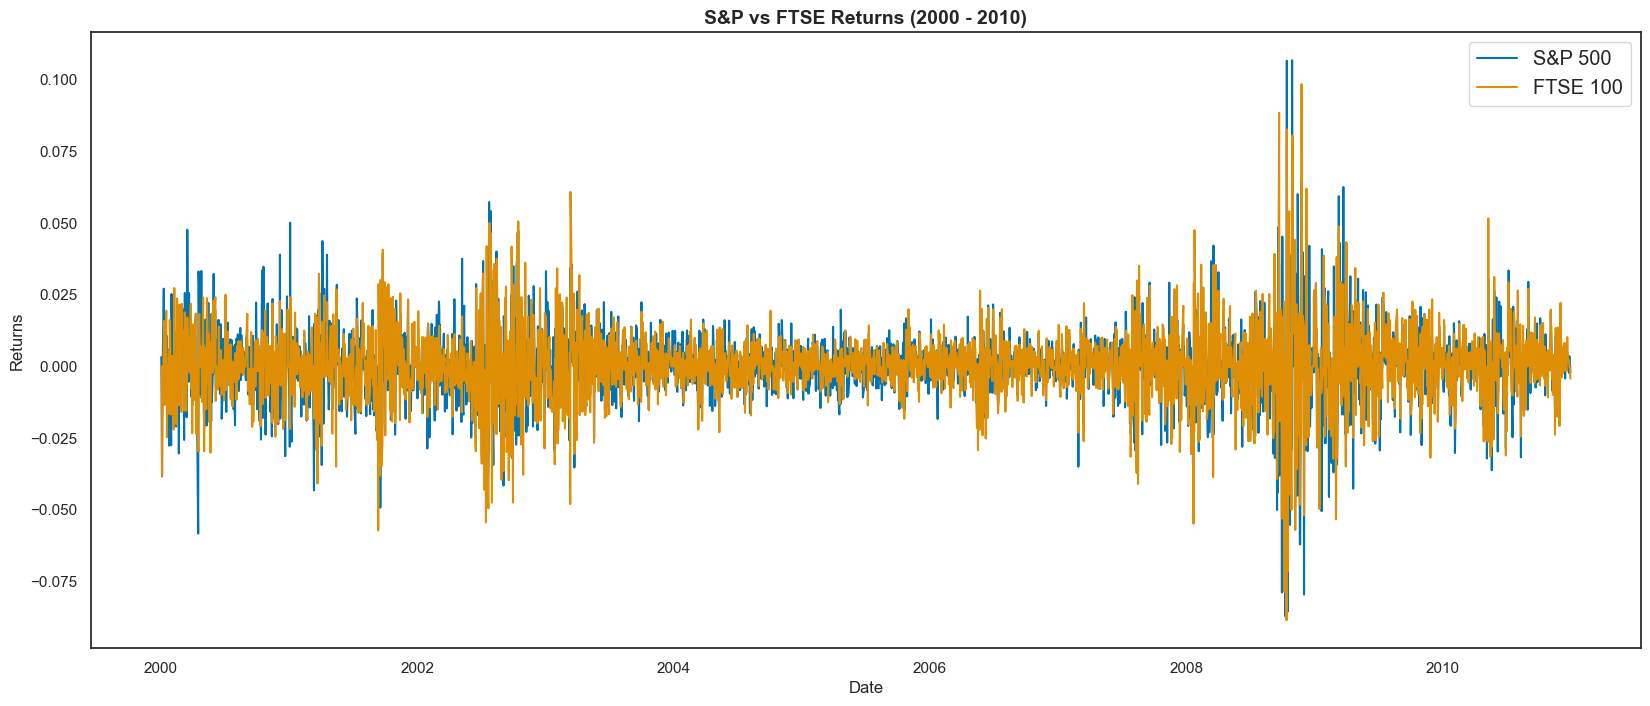

In [31]:
# line chart for the two indices: S&P 500 (in blue) vs FTSE 100 (in orange). The time frame is from 2000 until end of 2010
labels = ["S&P 500", "FTSE 100"] # legend labels list
plt.figure(figsize = (20, 8))
plt.plot(df_spx_ftse_00_10["new_date"], df_spx_ftse_00_10["GSPC500"])
plt.plot(df_spx_ftse_00_10["new_date"], df_spx_ftse_00_10["FTSE100"])
# chart formatting elements: title, labels and legend
plt.title("S&P vs FTSE Returns (2000 - 2010)", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.legend(labels = labels, fontsize = "large")
plt.show()

In [32]:

# introduce a new data frame for a specific time frame. Starts 07/01/2008 and ends 12/31/2008
df_spx_ftse_H2_08 = df_spx_ftse_00_10[(df_spx_ftse_00_10.new_date >= '2008-07-01') &
                                      (df_spx_ftse_00_10.new_date <= '2008-12-31')]

In [33]:
df_spx_ftse_H2_08

,Date,GSPC500,FTSE100,new_date
2216,7/1/2008,-0.001072,0.017360,2008-07-01
2217,7/2/2008,0.007151,-0.025951,2008-07-02
2218,7/3/2008,-0.017779,-0.009781,2008-07-03
2219,7/4/2008,0.000000,0.009270,2008-07-04
2220,7/7/2008,-0.000048,-0.011650,2008-07-07
...,...,...,...,...
2343,12/25/2008,0.000000,0.000000,2008-12-25
2344,12/26/2008,0.006529,0.000000,2008-12-26
2345,12/29/2008,0.003289,0.000000,2008-12-29
2346,12/30/2008,-0.002052,0.024380,2008-12-30


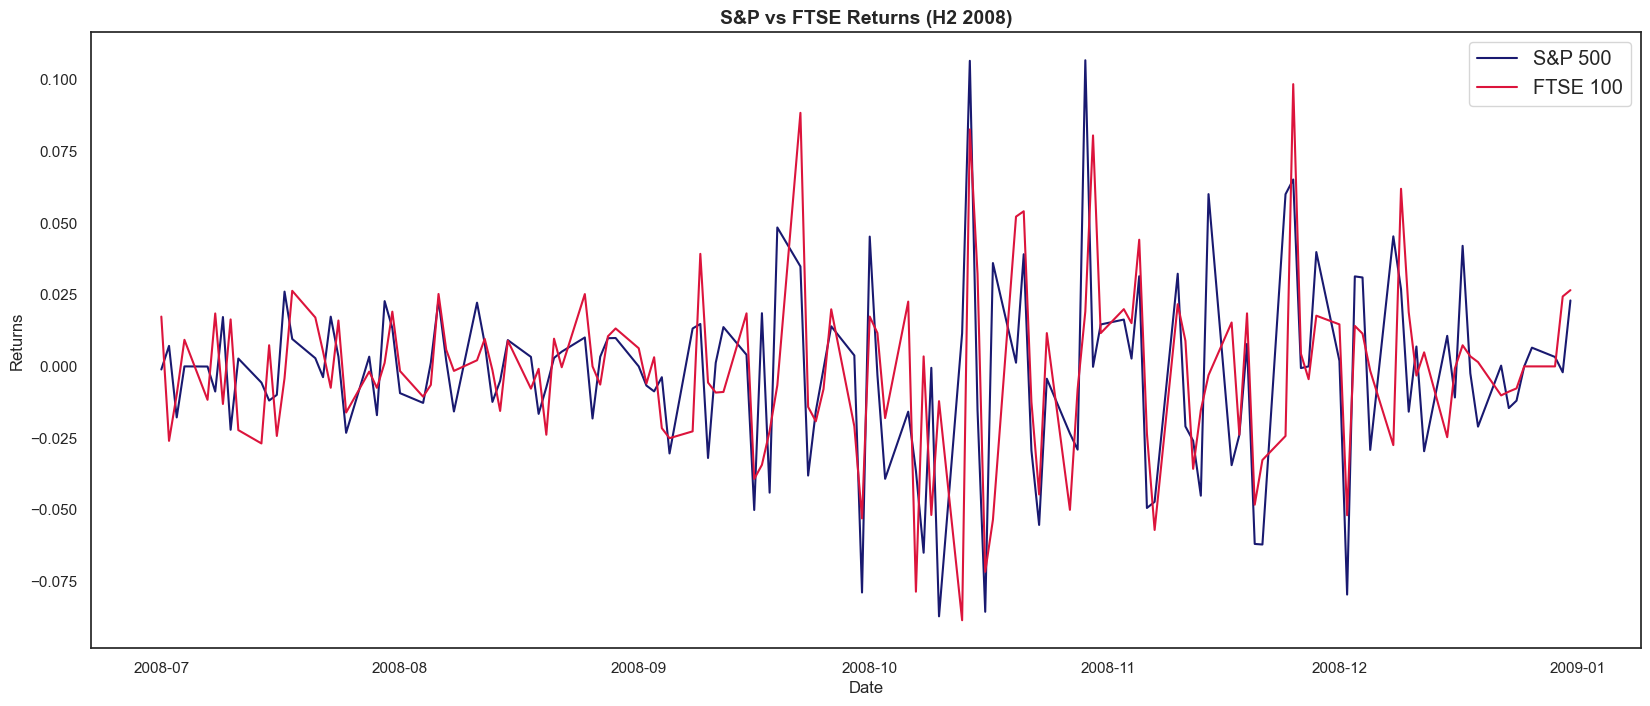

In [34]:
# line chart for the two indices S&P 500 (in dark blue) vs FTSE 100 (in crimson red). The time frame is H2(second half) of 2008 
plt.figure(figsize = (20, 8))
plt.plot(df_spx_ftse_H2_08["new_date"], df_spx_ftse_H2_08["GSPC500"], color = "midnightblue")
plt.plot(df_spx_ftse_H2_08["new_date"], df_spx_ftse_H2_08["FTSE100"], color = "crimson")
plt.title("S&P vs FTSE Returns (H2 2008)", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.legend(labels = labels, fontsize = "large")
plt.show()

## Histogram

In [35]:
# Load real estate data set for the histogram
df_real_estate = pd.read_csv("realestate_data.csv")

In [36]:
df_real_estate

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
1,1029,1,2005.0,10.0,Apartment,29,756.21,246
2,2002,2,2007.0,7.0,Apartment,2,587.28,209
3,2031,2,2007.0,12.0,Apartment,31,1604.75,453
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467
...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,323
263,5047,5,NaN,NaN,Apartment,47,794.52,279
264,5048,5,NaN,NaN,Apartment,48,1013.27,288
265,5050,5,NaN,NaN,Apartment,50,1074.71,366


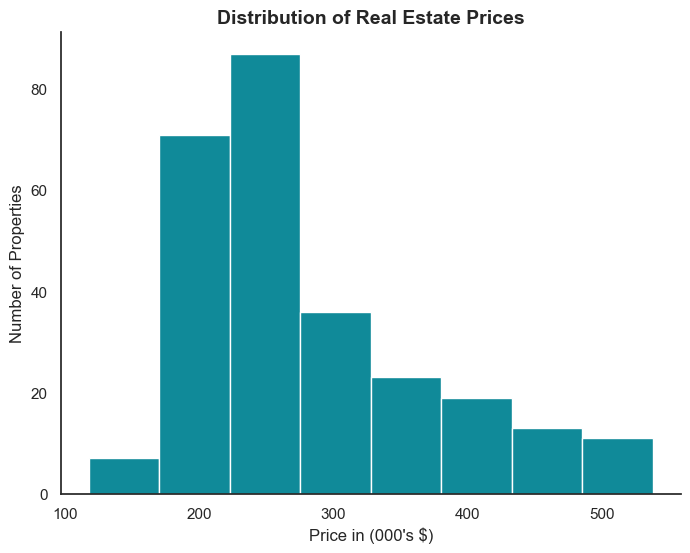

In [37]:
sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
plt.figure(figsize = (8, 6)) # determine the size of the figure
plt.hist(df_real_estate["Price"], # the variable on which to create the histogram
         bins = 8, # create a histogram with 8 bins
         color = "#108A99")
plt.title("Distribution of Real Estate Prices", fontsize = 14, weight = "bold")
plt.xlabel("Price in (000's $)")
plt.ylabel("Number of Properties")
sns.despine() # removes the top and right border of our graph
plt.show()

## Scatter Plot

In [38]:
#load the real estate data for the scatter plot
df_real_estate = pd.read_csv("realestate_data.csv")

In [39]:
df_real_estate

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
1,1029,1,2005.0,10.0,Apartment,29,756.21,246
2,2002,2,2007.0,7.0,Apartment,2,587.28,209
3,2031,2,2007.0,12.0,Apartment,31,1604.75,453
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467
...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,323
263,5047,5,NaN,NaN,Apartment,47,794.52,279
264,5048,5,NaN,NaN,Apartment,48,1013.27,288
265,5050,5,NaN,NaN,Apartment,50,1074.71,366


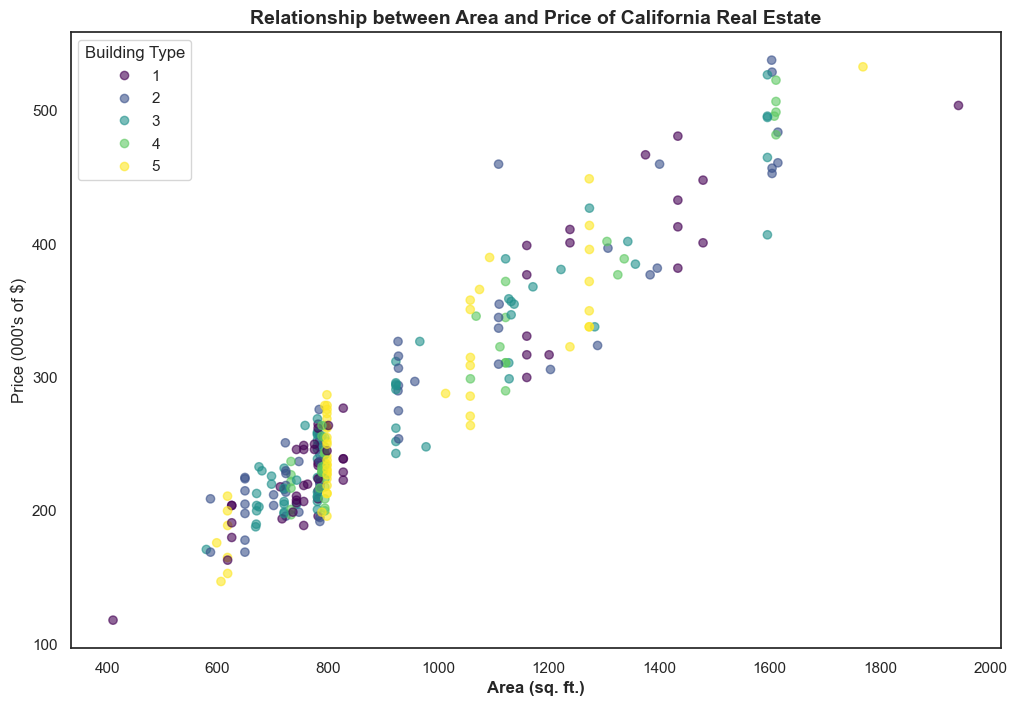

In [40]:
# scatter plot with matplotlib's pyplot. Depending on what features you'd like to include,
# this version might not give as many high level options as seaborn. However, technically, it should perform just as well. 
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(df_real_estate['Area (ft.)'],
            df_real_estate['Price'], 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            c = df_real_estate['Building Type'], # additional third feature
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "Building Type")
plt.title("Relationship between Area and Price of California Real Estate", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Area (sq. ft.)", weight = "bold")
plt.ylabel("Price (000's of $)")
plt.show()

## Regression Plot

In [44]:
#load the marketing data set for the regression plot
df_ad_expenditure = pd.read_csv("budget_data.csv")

In [45]:
df_ad_expenditure

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


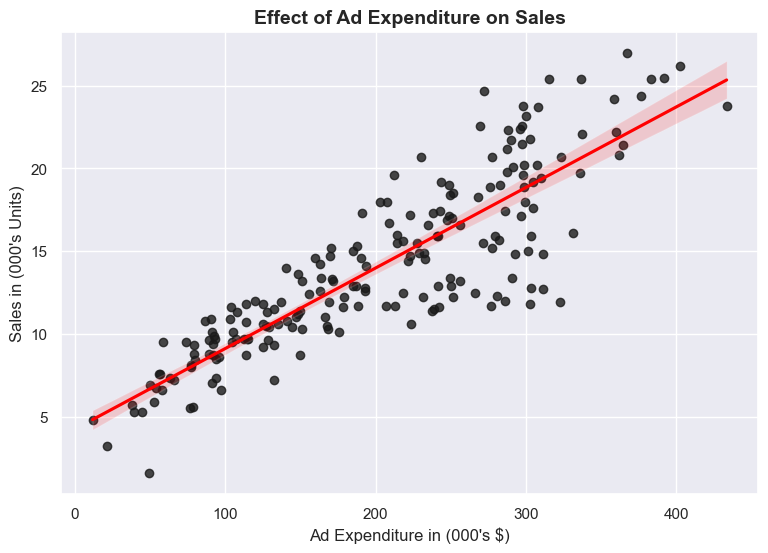

In [46]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "Budget", 
            y = "Sales", 
            data = df_ad_expenditure, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("Ad Expenditure in (000's $)")
plt.ylabel("Sales in (000's Units)")
plt.title("Effect of Ad Expenditure on Sales", fontsize = 14, weight = "bold")
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


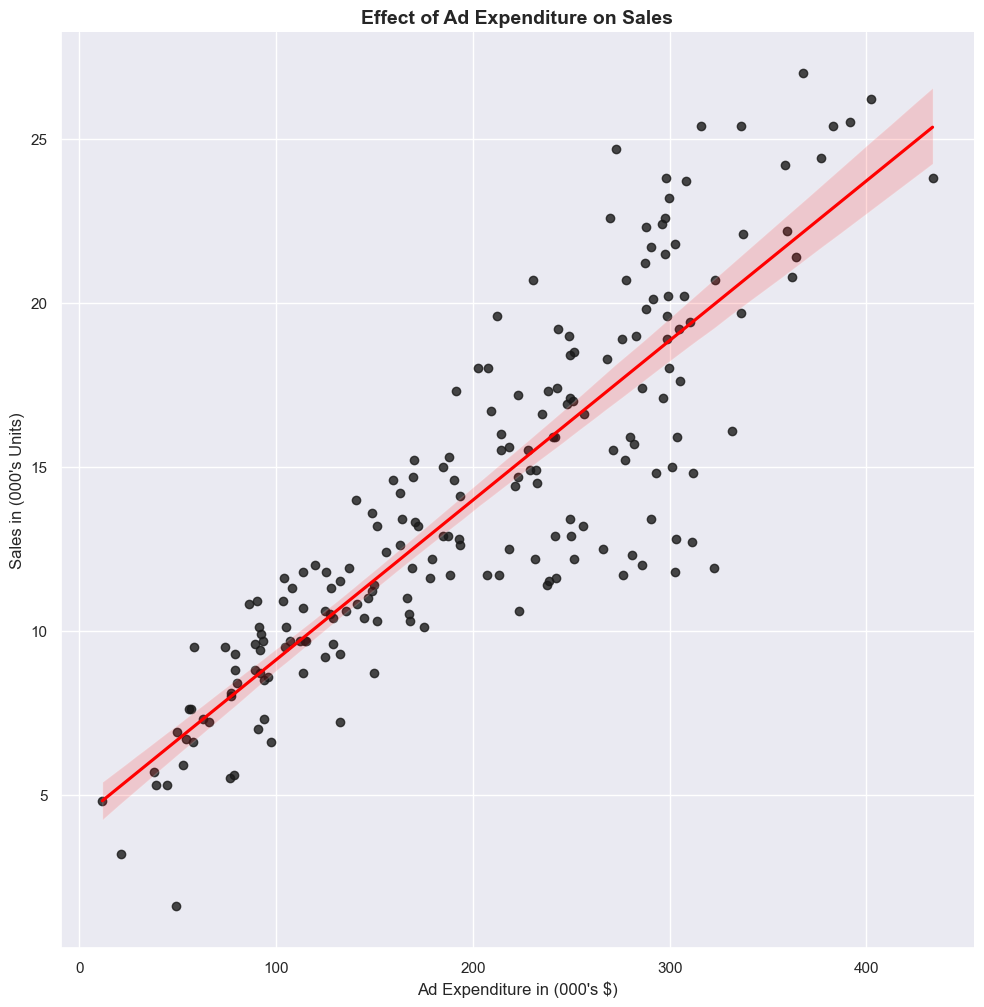

In [47]:
sns.lmplot(x = "Budget", 
           y = "Sales", 
           data = df_ad_expenditure, 
           height = 10, # height and width of the plot
           scatter_kws = {'color': 'k'}, # color for the points
           line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("Ad Expenditure in (000's $)")
plt.ylabel("Sales in (000's Units)")
plt.title("Effect of Ad Expenditure on Sales", fontsize = 14, weight = "bold")
plt.show()

## Bar and Line Chart

In [48]:
df_kdnuggets = pd.read_csv("python_data.csv") #read in the KDnuggets survey data file

In [49]:
# The data frame, which we'll use to create the combo plot. The two charts will share the x-axis which is Year.
# The bar chart will have the number of Participants on the primary x-axis(on the lefthandside of the chart)
# The line chart will have the Python Users in percentages on a secondary y-axis(on the righthandside of the chart)
df_kdnuggets

,Year,Python Users,Participants
0,2012,0.149,798
1,2013,0.133,1880
2,2014,0.195,3285
3,2015,0.303,2800
4,2016,0.458,2895
5,2017,0.526,2900
6,2018,0.656,2300
7,2019,0.658,1800


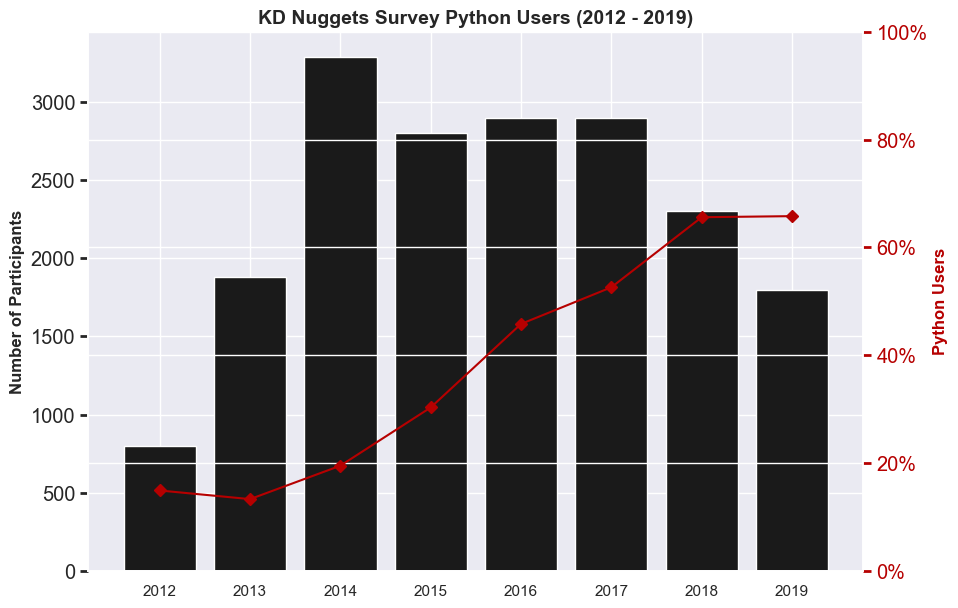

In [50]:
# Creating the combination chart. Here we use a figure with axes.
# The first axes or subplot is the bar chart, the second is the line chart. 
fig, ax = plt.subplots(figsize = (10, 7))

#creating and styling the bar chart
ax.bar(df_kdnuggets["Year"],
       df_kdnuggets["Participants"],
       color = "k")
ax.set_ylabel("Number of Participants", 
              weight = "bold")
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = "large")
ax1 = ax.twinx()
#changing the secondary y-axis to display percentages on a scale from 0% to 100%
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))
#creating and styling the line chart
ax1.plot(df_kdnuggets["Year"],
         df_kdnuggets["Python Users"], 
         color = "#b60000", 
         marker = "D")
ax1.set_ylabel("Python Users", 
               color = "#b60000", 
               weight = "bold")
ax1.tick_params(axis = "y", 
                colors = "#b60000", 
                width = 2, 
                labelsize = "large")
ax.set_title("KD Nuggets Survey Python Users (2012 - 2019)", fontsize = "14", weight = "bold")
plt.show()